# Do logarithmic proximity measures outperform plain ones in graph clustering?

In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import adjusted_rand_score
from joblib import Parallel, delayed
from collections import defaultdict

In [3]:
from pygraphs.graphs.generator import StochasticBlockModel
from pygraphs.graphs.dataset import Datasets
from pygraphs.measure import kernels
from pygraphs.cluster import KKMeans
from pygraphs.scenario import ParallelByGraphs, d3_colors
from pygraphs.util import load_or_calc_and_save, configure_logging
from pygraphs.scorer import copeland

In [4]:
import logging
configure_logging()
logger = logging.getLogger()

## 6. Cluster analysis on several classical datasets

For each dataset and each measure family, we sorted 55 values of the family parameter in the descending order of the
corresponding ARI. ARI against the rank of the family parameter value is shown in Fig. 9.

In [5]:
all_datasets = Datasets().all
# all_datasets = all_datasets[:2] + all_datasets[3:7] + all_datasets[14:]
all_datasets = all_datasets[:2] + all_datasets[3:12] + all_datasets[14:]
[(idx, x[1]['name']) for idx, x in enumerate(all_datasets)]

[(0, 'football'),
 (1, 'polbooks'),
 (2, 'zachary'),
 (3, 'news_2cl_1'),
 (4, 'news_2cl_2'),
 (5, 'news_2cl_3'),
 (6, 'news_3cl_1'),
 (7, 'news_3cl_2'),
 (8, 'news_3cl_3'),
 (9, 'news_5cl_1'),
 (10, 'news_5cl_2'),
 (11, 'webkb_cornell'),
 (12, 'webkb_texas'),
 (13, 'webkb_washington'),
 (14, 'webkb_wisconsin')]

In [6]:
def perform(classic_plot, dataset):
    dataset_results = {}
    graphs, info = dataset
    print(info)
    for measure_class in tqdm(kernels, desc=info['name']):
        x, y, error = classic_plot.perform(KKMeans, measure_class, graphs, info['k'], n_jobs=1)
        dataset_results[measure_class.name] = (x, y)
    print(f'COMPLETED {info["name"]}')
    return info['name'], dataset_results


@load_or_calc_and_save('results/6_1b_4.pkl')
def calc():
    classic_plot = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 51), progressbar=False)
#     results = {}
#     for dataset in all_datasets:
#         try:
#             print(dataset[1]['name'])
#             dataset_name, dataset_results = perform(classic_plot, dataset)
#             results[dataset_name] = dataset_results
#             print(dataset_results)
#         except Exception as e:
#             print("Fall on {}".format(dataset[1]['name']))
#             print(e)
#     return results
    return dict(Parallel(n_jobs=12)(delayed(perform)(classic_plot, dataset) for dataset in all_datasets))
    

results = calc()

football


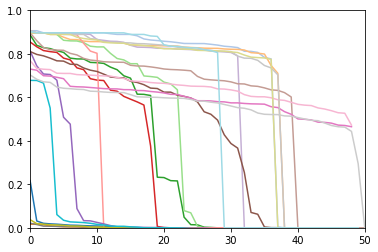

polbooks


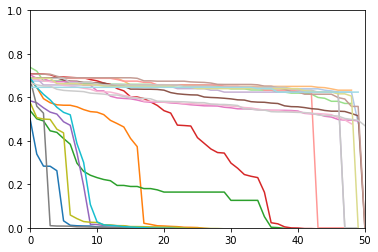

zachary


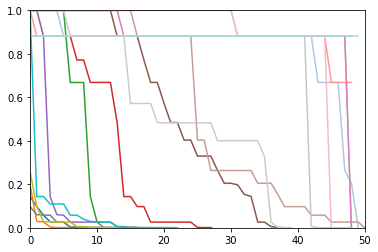

news_2cl_1


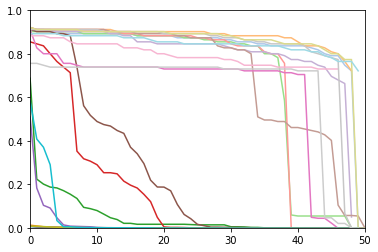

news_2cl_2


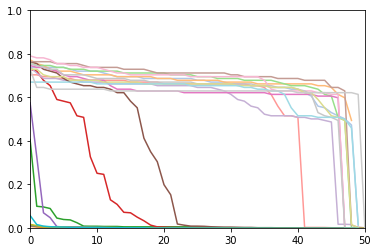

news_2cl_3


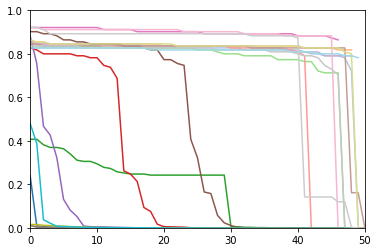

news_3cl_1


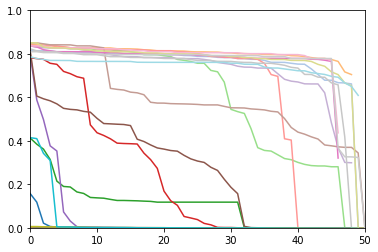

news_3cl_2


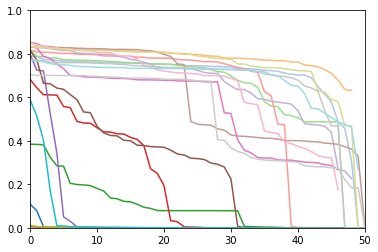

news_3cl_3


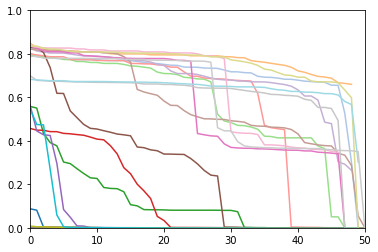

news_5cl_1


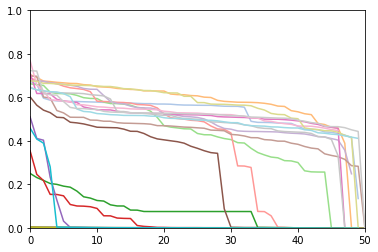

news_5cl_2


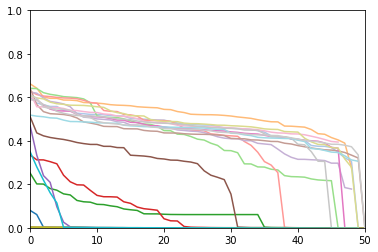

webkb_cornell


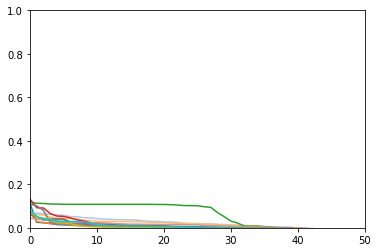

webkb_texas


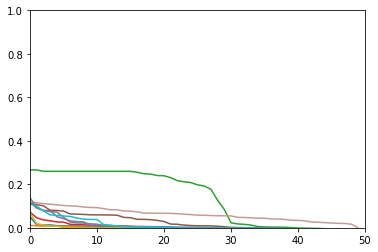

webkb_washington


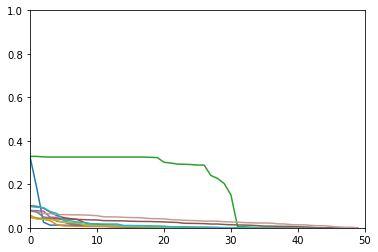

webkb_wisconsin


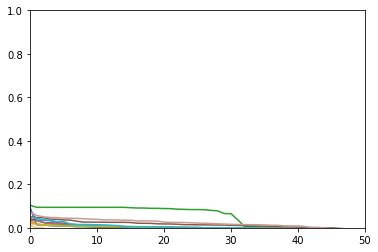

In [7]:
for dataset_name, measure_results in results.items():
    print(dataset_name)
    for measure_name in measure_results.keys():
        x, y = measure_results[measure_name]
        plt.plot(range(len(y)), sorted(y, reverse=True), color=d3_colors[measure_name])
    plt.xlim(0, 50)
    plt.ylim(0, 1)
    plt.show()

In [8]:
print('', end="\t")
for dataset in all_datasets:
    dataset_name = dataset[1]['name']
    print(dataset_name, end="\t")
print()
for kernel in kernels:
    kernel_name = kernel.name
    print(kernel_name, end="\t")
    for dataset in all_datasets:
        dataset_name = dataset[1]['name']
        try:
            measure_results = np.max(results[dataset_name][kernel_name][1])
        except:
            measure_results = '-'
        print('{}\t'.format(measure_results), end=" ")
    print()

	football	polbooks	zachary	news_2cl_1	news_2cl_2	news_2cl_3	news_3cl_1	news_3cl_2	news_3cl_3	news_5cl_1	news_5cl_2	webkb_cornell	webkb_texas	webkb_washington	webkb_wisconsin	
pWalk	0.21711329447901082	 0.5012982191129387	 0.14377289377289382	 0.005611786485280494	 0.013300146810404	 0.24229592039537315	 0.1579816522329592	 0.1089641098847219	 0.08743860499214201	 0.005095035374627437	 0.08004638465925074	 0.11071028784383223	 0.050042368891818075	 0.32518876428023585	 0.09321343284268342	 
Walk	0.9063341575567592	 0.6748603238300134	 1.0	 0.9118040071459759	 0.737733556312057	 0.8272562837774026	 0.8145423908367398	 0.78917979598933	 0.8041609299864778	 0.6736298996781568	 0.6018473294710647	 0.068799916037186	 -	 -	 -	 
For	0.01682622708049534	 0.6813459647100168	 0.19721050924424255	 0.011925852428976978	 0.006616834996927672	 0.010236447738625747	 0.0026222801658894405	 0.005449500757843261	 0.005012226411914571	 0.0025453537109387642	 0.0029993754242651684	 0.06939138729384257	 0.0